In [2]:
!pip install matplotlib

    100% |████████████████████████████████| 13.1MB 2.7MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 32.5MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 25.6MB/s ta 0:00:01
You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import requests
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt


def download_mnist():
    return input_data.read_data_sets("MNIST_data/", one_hot = True)

def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d,cmap=plt.cm.gray_r, interpolation='nearest')
    return plt



In [4]:
mnist = download_mnist()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

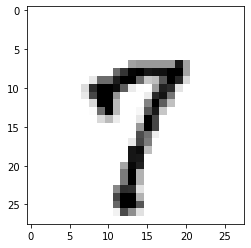

401


In [7]:
batch_xs, batch_ys = mnist.train.next_batch(1)
chosen=0
gen_image(batch_xs[chosen]).show()
data = batch_xs[chosen].reshape((1,784))
features = ["X"+str(i+1) for i in range (0,784)]
request = {"data":{"names":features,"ndarray":data.tolist()}}
deploymentName = "mnist-classifier"
uri = "http://istio-ingressgateway.istio-system.svc.cluster.local/seldon/"+deploymentName+"/api/v0.1/predictions"

response = requests.post(
    uri,
    json=request)

print(response.status_code)


In [9]:
print(response.text)

Origin authentication failed.
